## Task-02

Problem Statement-To create K-means clustering algorithm to group cutomers of retail store based on their purchase history.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#since CustomerId will not help in obtaining any useful result,hence we'll drop it.
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## EDA on dataset

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

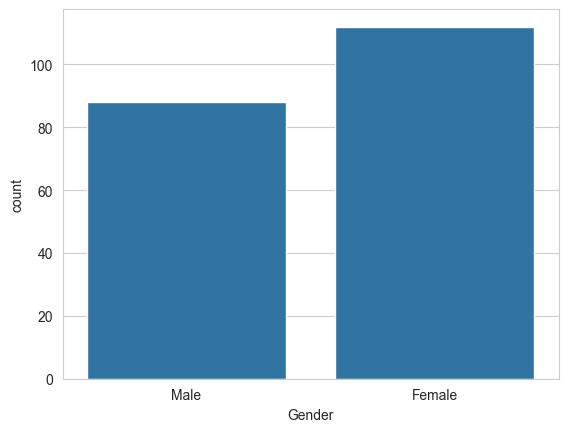

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df)

C:\Users\sc\AppData\Local\Temp\ipykernel_5972\3013151164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde=True,bins=40,color='darkred')


<Axes: xlabel='Age', ylabel='Density'>

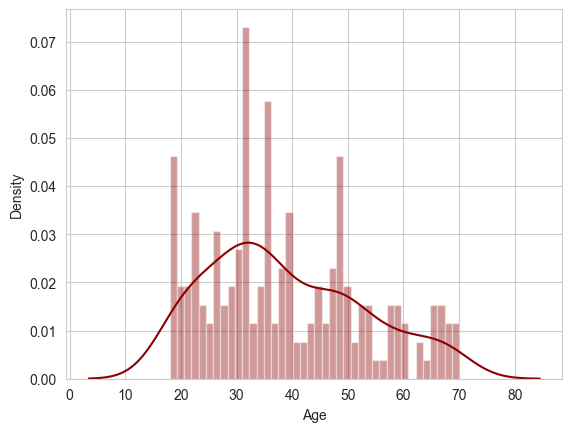

In [10]:
sns.distplot(df['Age'],kde=True,bins=40,color='darkred')

In [11]:
df['Age'].skew()

0.48556885096681657

C:\Users\sc\AppData\Local\Temp\ipykernel_5972\3569498001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'],kde=True,bins=40,color='darkred')


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

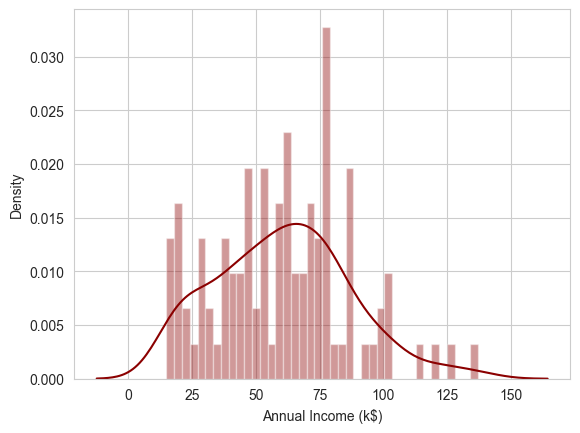

In [12]:
sns.distplot(df['Annual Income (k$)'],kde=True,bins=40,color='darkred')

In [13]:
df['Annual Income (k$)'].skew()

0.3218425498619055

C:\Users\sc\AppData\Local\Temp\ipykernel_5972\592426902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'],kde=True,bins=40,color='darkred')


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

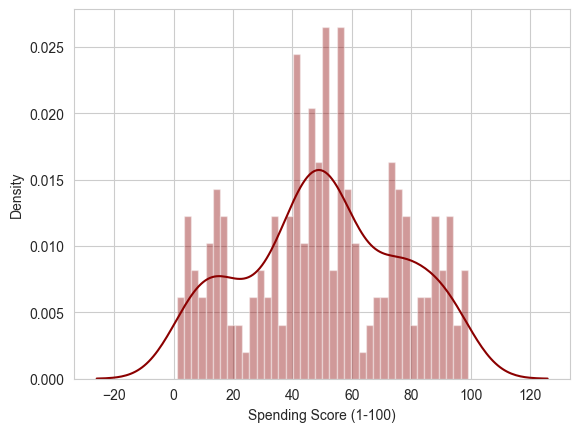

In [14]:
sns.distplot(df['Spending Score (1-100)'],kde=True,bins=40,color='darkred')

In [15]:
df['Spending Score (1-100)'].skew()

-0.047220201374263374

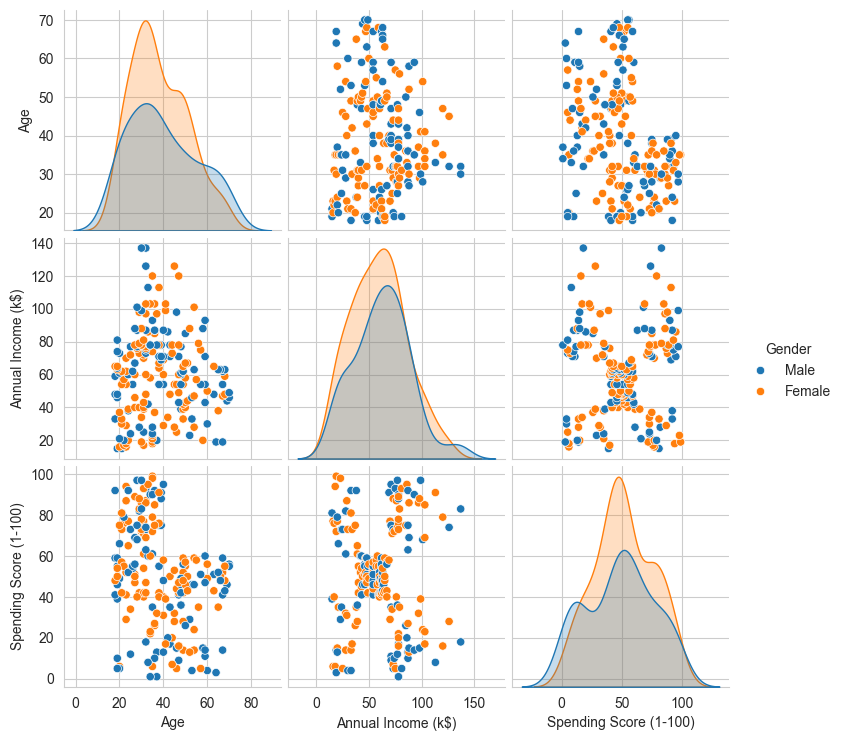

In [16]:

sns.pairplot(df,hue='Gender')

In [23]:
features=['Age','Annual Income (k$)','Spending Score (1-100)']
df1=df[features]
correlation=df1.corr()

<Axes: >

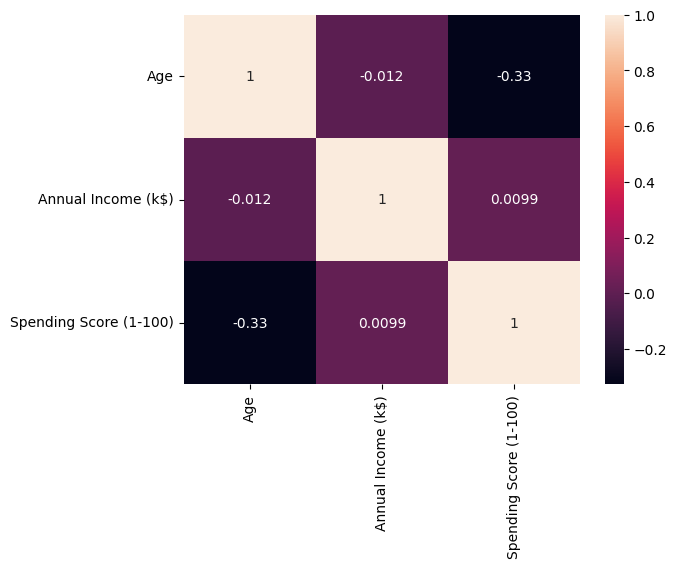

In [24]:
sns.heatmap(correlation,annot=True)

## Feature Engineering

 Handling categorical variable
 Since gender has two category i.e it is nominal categorical feature so we have to do one hot encoding

In [26]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder()
transformer=ColumnTransformer(transformers=[('tnf',OneHotEncoder(drop='first'),['Gender'])],remainder='passthrough')


In [27]:
df_new=pd.DataFrame(transformer.fit_transform(df))
df_new


,0,1,2,3
0,1.0,19.0,15.0,39.0
1,1.0,21.0,15.0,81.0
2,0.0,20.0,16.0,6.0
3,0.0,23.0,16.0,77.0
4,0.0,31.0,17.0,40.0
...,...,...,...,...
195,0.0,35.0,120.0,79.0
196,0.0,45.0,126.0,28.0
197,1.0,32.0,126.0,74.0
198,1.0,32.0,137.0,18.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()

In [30]:
data=pd.DataFrame(scaler.fit_transform(df_new))
data


,0,1,2,3
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [31]:
X=data.iloc[:,[2,3]].values
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

## Model training

In [32]:
from sklearn.cluster import KMeans

To implement K-means modelling we need to obtain optimal number of clusters, for which within cluster sum of square distance is minimum

In [33]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Elbow plot

Text(0.5, 1.0, 'Elbow plot')

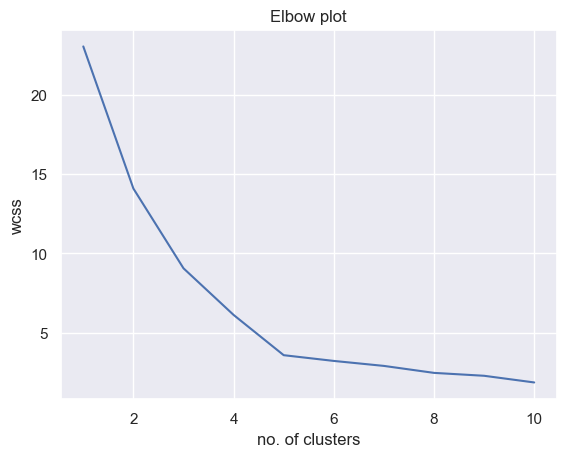

In [34]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.title('Elbow plot')

From elbow plot it can be seen that wcss is least for no. of clusters,K=5

In [35]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_predict=kmeans.fit_predict(X)
y_predict

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

Evaluating model using Silhouette score

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X,y_predict)

0.5594854531357838

Text(0, 0.5, 'Spending Score')

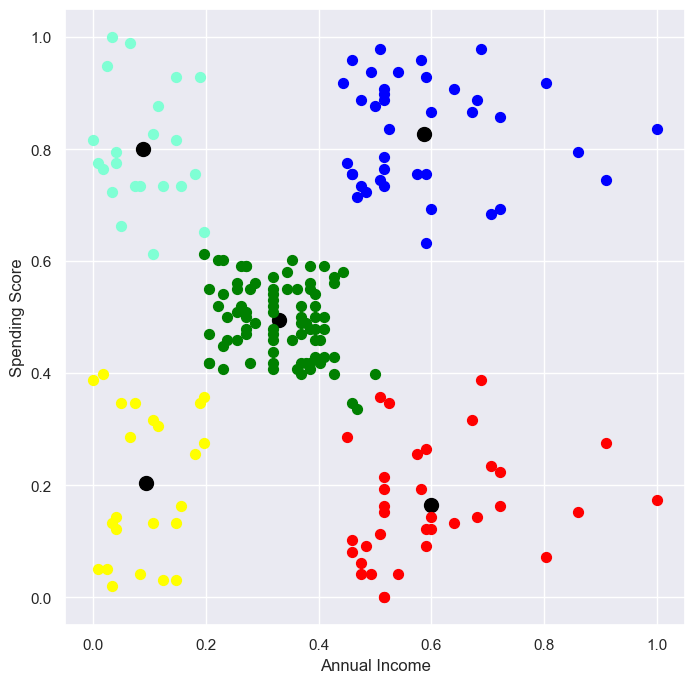

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.scatter(X[y_predict==0,0],X[y_predict==0,1],color='green',s=50,label='Cluster1')
plt.scatter(X[y_predict==1,0],X[y_predict==1,1],color='red',s=50,label='Cluster2')
plt.scatter(X[y_predict==2,0],X[y_predict==2,1],color='blue',s=50,label='Cluster3')
plt.scatter(X[y_predict==3,0],X[y_predict==3,1],color='yellow',s=50,label='Cluster4')
plt.scatter(X[y_predict==4,0],X[y_predict==4,1],color='aquamarine',s=50,label='Cluster5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Model Interpretation:


Cluster 1: Average in terms of earning and spending

Cluster 2: Earning high, spending less 

Cluster 3: Earning high, spending high (Target Set)

Cluster 4: Earning less, spending less

Cluster 5: Earning less, spending more